<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#S-plot" data-toc-modified-id="S-plot-5">S plot</a></span></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

# Functions


In [2]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")

In [3]:
median.cohorts.fx <- function(df){
    
    Div_df.cohorts <- cbind.data.frame(unique(df$group), unique(df$cohort), NA)
    
    colnames(Div_df.cohorts) <- c("group","cohort", "median") 
     
    for(i in 1:nrow(Div_df.cohorts)){
        Div_df.cohorts$median[i] <- median(na.omit(df$CD8_CIBERSORT[df$cohort == Div_df.cohorts$cohort[i]]))
    } 

    Div_df.cohorts <- Div_df.cohorts[order(Div_df.cohorts$median),]
    return(Div_df.cohorts)
}

In [4]:
sort.cohorts.fx <- function(df, median_df){
    disease.width <- (nrow(df)/nrow(median_df)) 
    sorted.df <- df[0,]
    start = 0
    for(i in 1:(nrow(median_df))){
        tmp <- df[df$cohort==median_df$cohort[i],]
        tmp <- tmp[order(tmp$CD8_CIBERSORT),]
        tmp <- tmp[!is.na(tmp$CD8_CIBERSORT),] 
    #create range of x values to squeeze dots into equal widths of the plot for each Disease regardless of the number of samples
        div <- disease.width/nrow(tmp)
    #If there is only one sample, put the dot in the middle of the alloted space
        if(dim(tmp)[1]==1){
            tmp$Xpos<-start+(disease.width/2)
        } 
        else tmp$Xpos <- seq(from = start, 
                         to = start+disease.width, 
                         by = div)[-1]
        sorted.df <- rbind(sorted.df, tmp)  
        median_df$Median.start[i] <- tmp$Xpos[1]
        median_df$Median.stop[i] <- tmp$Xpos[nrow(tmp)]
        median_df$N[i]<-nrow(tmp)
        start <- start+disease.width+30

    }
    median_df$medianloc <- median_df$Median.start+
    ((median_df$Median.stop-median_df$Median.start)/2)
    sorted.df$cohort <- factor(sorted.df$cohort,
                               levels = median_df$cohort)
    return(list(sorted.df,median_df))
}

In [5]:
Splot.fx <- function(list.sorted_df.median, plottitle){       
    sorted_df <- as.data.frame(list.sorted_df.median[1])
    median_df <- as.data.frame(list.sorted_df.median[2])
    disease.width <- (nrow(sorted_df)/nrow(median_df)) 
 
    colpal <- c("High" = "Red",
               "Low" = "Blue",
               "Intermediate" = "Light grey")
    
    Splot <- ggplot() +
    geom_point(data = sorted_df, aes(x = Xpos ,y = CD8_CIBERSORT, color = CD8Level), size = 5) +
    geom_crossbar(data = median_df, 
                  aes(x =medianloc, y = median,
                      ymin = median, ymax = median),
                  width = disease.width) +
    theme(axis.title.x = element_blank(),
          axis.text.x = element_text(angle = 45, hjust = 1), 
          axis.line = element_line(color = "black"),
          axis.text = element_text(size = 22),
          axis.title = element_text(size = 22), 
          plot.title = element_text(size=22),
          legend.position = "none") +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_rect(fill = "transparent",
                                          colour = NA),
          panel.border=element_blank(),
          plot.margin = unit(c(1.2,1,0,1),"cm")) +
    scale_color_manual(values = colpal) +
    scale_x_continuous(breaks = seq((disease.width)/2,max(sorted_df$Xpos),
                                    disease.width+30),
                       labels = median_df$cohort,
                       expand = c(0,20)) + 
    labs(y = "CD8 inference with CIBERSORT", title = plottitle) 
    return(Splot)  
}

# Paths

In [6]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Plots/"

# Main

In [9]:
filelist <- list.files(datapath, recursive= T,pattern = "estimation_matrix_timer")

In [10]:
filelist

[1] "Deconvolution/Original_values/estimation_matrix_timer100.csv" 
 [2] "Deconvolution/Original_values/estimation_matrix_timer1000.csv"
 [3] "Deconvolution/Original_values/estimation_matrix_timer1100.csv"
 [4] "Deconvolution/Original_values/estimation_matrix_timer1200.csv"
 [5] "Deconvolution/Original_values/estimation_matrix_timer1300.csv"
 [6] "Deconvolution/Original_values/estimation_matrix_timer1400.csv"
 [7] "Deconvolution/Original_values/estimation_matrix_timer1500.csv"
 [8] "Deconvolution/Original_values/estimation_matrix_timer1600.csv"
 [9] "Deconvolution/Original_values/estimation_matrix_timer1700.csv"
[10] "Deconvolution/Original_values/estimation_matrix_timer1851.csv"
[11] "Deconvolution/Original_values/estimation_matrix_timer200.csv" 
[12] "Deconvolution/Original_values/estimation_matrix_timer300.csv" 
[13] "Deconvolution/Original_values/estimation_matrix_timer400.csv" 
[14] "Deconvolution/Original_values/estimation_matrix_timer500.csv" 
[15] "Deconvolution/Original_values/estimation_matrix_timer600.csv" 
[16] "Deconvolution/Original_values/estimation_matrix_timer700.csv" 
[17] "Deconvolution/Original_values/estimation_matrix_timer800.csv" 
[18] "Deconvolution/Original_values/estimation_matrix_timer900.csv"

In [11]:
all.files <- lapply(filelist, function(f){ read.csv(paste0(datapath,f), header = TRUE, check.names = F,
                                                    stringsAsFactors = F, row.names = 1)})

In [12]:
th_timer2 <- do.call(cbind, all.files)

In [13]:
dim(th_timer2)

[1]  119 1851

In [14]:
metadata <- read.csv(paste0(datapath,"treehouse_metadata.csv"), 
                     stringsAsFactors = F, header = T, row.names = 1, check.names =F)

Recode cancer types to full names for S plot

In [15]:
metadata$diseasetype[metadata$diseasetype =="EWS"] <- "Ewings sarcoma"
metadata$diseasetype[metadata$diseasetype =="Rhabdoid"] <- "Rhabdoid tumor"
metadata$diseasetype[metadata$diseasetype =="SARC"] <- "Other sarcoma"
metadata$diseasetype[metadata$diseasetype =="RMS"] <- "Rhabdomyosarcoma"
metadata$diseasetype[metadata$diseasetype =="WILMS"] <- "Wilms tumor"
metadata$diseasetype[metadata$diseasetype =="OS"] <- "Osteosarcoma"
metadata$diseasetype[metadata$diseasetype =="NBL"] <- "Neuroblastoma"

In [16]:
dim(metadata)

[1] 1851   10

In [17]:
metadata$CD8_CIBERSORT <- NA

In [18]:
cd8_ciber <- as.data.frame(t(th_timer2["T cell CD8+_CIBERSORT-ABS",]))

In [19]:
head(cd8_ciber)

,T cell CD8+_CIBERSORT-ABS
,<dbl>
TH40_2202_S02,0.033883973
TH40_2202_S03,0.010012048
TH40_2202_S01,0.019501252
TARGET-40-0A4I65-01A-01R,0.000000000
TH40_2274_S01,0.003588257
THR24_1965_S01,0.011603915


In [20]:
metadata$CD8_CIBERSORT <- cd8_ciber$`T cell CD8+_CIBERSORT-ABS`[match(metadata$th_sampleid,rownames(cd8_ciber))]

In [21]:
summary(metadata$CD8_CIBERSORT)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.006363 0.021598 0.023089 0.405047 

In [22]:
dim(metadata)

[1] 1851   11

In [23]:
length(unique(metadata$diseasetype))

[1] 25

In [24]:
tapply(metadata$CD8_CIBERSORT, metadata$diseasetype, summary)

$`Adrenocortical carcinoma`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.001587 0.003804 0.008741 0.010601 0.048161 

$`Breast cancer`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01148 0.04516 0.05872 0.06371 0.25632 

$`Cervical cancer`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02689 0.04214 0.04948 0.06982 0.15659 

$`Choroid plexus carcinoma`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.003162 0.000000 0.055486 

$`Dysembryoplastic neuroepithelial tumor`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0005253 0.0044771 0.0098756 0.0083093 0.0714840 

$Ependymoma
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.003581 0.004855 0.026864 

$`Ewings sarcoma`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000000 0.0005328 0.0132001 0.0114033 0.1593449 

$`Glioblastoma multiforme`
     Min.   1st Qu.    Median   

In [25]:
diseasefreq <- as.data.frame(table(metadata$diseasetype),
                             stringsAsFactors = F)

In [26]:
diseasefreq

Var1,Freq
<chr>,<int>
Adrenocortical carcinoma,33
Breast cancer,10
Cervical cancer,22
Choroid plexus carcinoma,26
Dysembryoplastic neuroepithelial tumor,13
Ependymoma,101
Ewings sarcoma,81
Glioblastoma multiforme,38
Glioma,300


In [27]:
highcd8freq <- as.data.frame(table(metadata$diseasetype[ metadata$CD8_CIBERSORT >= 0.10383]),
                             stringsAsFactors = F)
highcd8freq

Var1,Freq
<chr>,<int>
Breast cancer,1
Cervical cancer,1
Ewings sarcoma,2
Glioma,2
Lymphoma,5
Melanoma,7
Neuroblastoma,30
Osteosarcoma,7
Other sarcoma,3


In [28]:
highcd8freq$diseasefreq <- 

diseasefreq$Freq[match(highcd8freq$Var1, diseasefreq$Var1)]


In [29]:
highcd8freq$perc <- highcd8freq$Freq/highcd8freq$diseasefreq

In [30]:
highcd8freq

Var1,Freq,diseasefreq,perc
<chr>,<int>,<int>,<dbl>
Breast cancer,1,10,0.100000000
Cervical cancer,1,22,0.045454545
Ewings sarcoma,2,81,0.024691358
Glioma,2,300,0.006666667
Lymphoma,5,25,0.200000000
Melanoma,7,29,0.241379310
Neuroblastoma,30,201,0.149253731
Osteosarcoma,7,184,0.038043478
Other sarcoma,3,40,0.075000000


In [31]:
metadata$disease[ metadata$CD8_CIBERSORT >= 0.10383 &
                 metadata$diseasetype == "Melanoma"]

[1] "melanoma"                "skin cutaneous melanoma"
[3] "skin cutaneous melanoma" "skin cutaneous melanoma"
[5] "skin cutaneous melanoma" "skin cutaneous melanoma"
[7] "skin cutaneous melanoma"

# S plot

In [32]:
nrow(metadata[ metadata$CD8_CIBERSORT > 0.10383,])

[1] 95

In [33]:
95/1851

[1] 0.05132361

In [34]:
metadata$CD8Level <- NA
metadata$CD8Level[metadata$CD8_CIBERSORT >= 0.10383] <- "High"
metadata$CD8Level[metadata$CD8_CIBERSORT == 0] <- "Low"

metadata$CD8Level[metadata$CD8_CIBERSORT < 0.10383 & 
                  metadata$CD8_CIBERSORT > 0] <- "Intermediate"

~6% have high CD8 and span across cancer types

In [35]:
#recode 0 for Splot visualization

metadata$CD8_CIBERSORT[ metadata$CD8_CIBERSORT == 0 ] <- 0.00001

In [36]:
metadata$cohort <- metadata$diseasetype
metadata$group <- "TH"

In [37]:
th_mediandf <- median.cohorts.fx(metadata)

In [38]:
th_mediandf

,group,cohort,median
,<chr>,<chr>,<dbl>
10,TH,Choroid plexus carcinoma,0.0000100000
12,TH,Ependymoma,0.0000100000
1,TH,Medulloblastoma,0.0001999717
4,TH,Ewings sarcoma,0.0005327956
8,TH,Osteosarcoma,0.0024853526
5,TH,Other sarcoma,0.0027077517
9,TH,Glioma,0.0031461263
13,TH,Glioblastoma multiforme,0.0035152344
20,TH,Adrenocortical carcinoma,0.0038037858


In [39]:
list_sorted_df <- sort.cohorts.fx(metadata, th_mediandf)

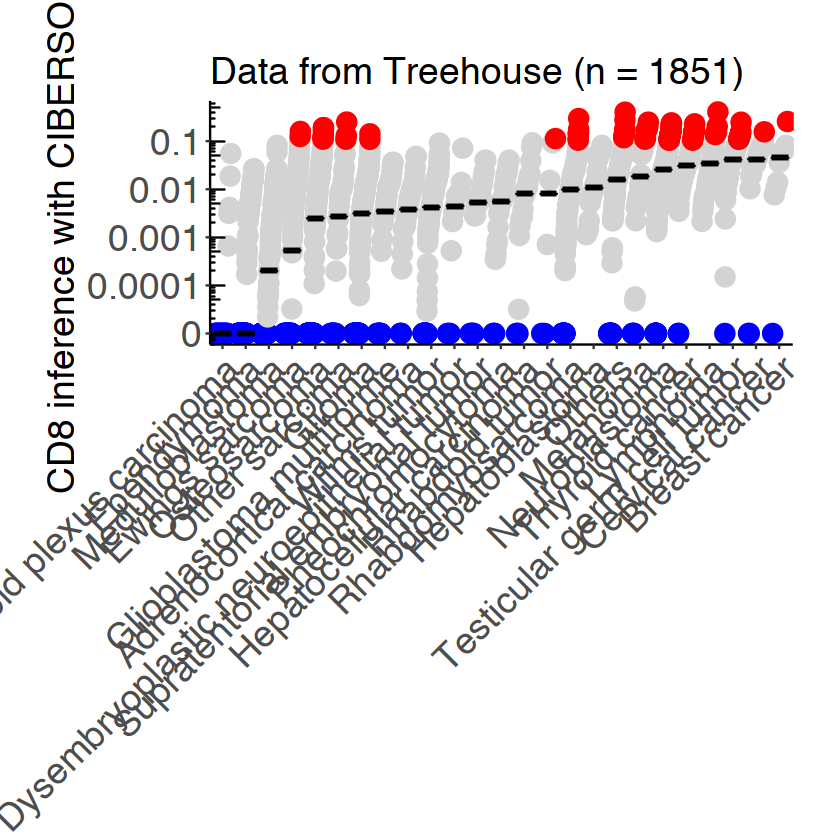

In [40]:
cd8_Splot <- Splot.fx(list_sorted_df, "Data from Treehouse (n = 1851)") + 
annotation_logticks(sides = "l") + scale_y_continuous(trans = "log10",
                                                      breaks = c(0.00001, 0.0001, 0.001, 0.01, 0.1),
                                                      label = c(0, 0.0001, 0.001, 0.01, 0.1)) 

cd8_Splot 

In [41]:
pdf(file = paste0(plotpath,"TH_Splot_CD8CIBERSORT_wlegend_originalvalues.pdf"),
    width = 25, 
    height = 12,
    useDingbats = FALSE,
    onefile = FALSE)

cd8_Splot + theme(legend.position = "right")

dev.off()

pdf 
  2

In [42]:
pdf(file = paste0(plotpath,"TH_Splot_CD8CIBERSORT_originalvalues.pdf"),
    width = 25, 
    height = 12,
    useDingbats = FALSE,
    onefile = FALSE)

cd8_Splot

dev.off()

pdf 
  2